## Import das bibliotecas:

In [6]:
from acquisition import Acquisition
from reflector_grid import ReflectorGrid
from transducer import Transducer
from imaging import *

import matplotlib.pyplot as plt

## Input de dados:

In [7]:
# Parâmetros de simulação:
cp = 1.483  # Velocidade de propagação no meio em mm/us
fs = 10e6 # Frequência de amostragem em Hz
gate_start = 0  # Início do gate em us
gate_end = 50  # Fim do gate em us
fc = 5e6  # Frequência central do transdutor em Hz


## Criação dos Objetos para Simulação:

In [8]:
# Create punctual reflectors grid:
reflector_grid = ReflectorGrid(width=5, height=5, xres=.5, zres=.5)

# Create transducer:
transducer = Transducer(n_elem=32, fc=fc)

# Create acquisiton object:
acq = Acquisition(cp, fs, gate_start, gate_end, reflector_grid, transducer)

progress = 3.12
progress = 6.25
progress = 9.38
progress = 12.50
progress = 15.62
progress = 18.75
progress = 21.88
progress = 25.00
progress = 28.12
progress = 31.25
progress = 34.38
progress = 37.50
progress = 40.62
progress = 43.75
progress = 46.88
progress = 50.00
progress = 53.12
progress = 56.25
progress = 59.38
progress = 62.50
progress = 65.62
progress = 68.75
progress = 71.88
progress = 75.00
progress = 78.12
progress = 81.25
progress = 84.38
progress = 87.50
progress = 90.62
progress = 93.75
progress = 96.88
progress = 100.00


## Aplicação do método de reconstrução de imagem:

In [15]:
# Localização do refletor que deseja-se reconstruir em mm:
xr = 2.5
zr = 4

#
sampled_fmc = acq.generate_signal(xr, zr)
sampled_signal = np.ravel(sampled_fmc)
signal_size = len(sampled_signal)

#
imgsize = reflector_grid.get_imgsize()
img = passarin_method(
    np.reshape(acq.fmc_basis, newshape=(signal_size, reflector_grid.get_numpxs())),
    sampled_signal,
    reflector_grid.get_imgsize()
)

## Display dos resultados:

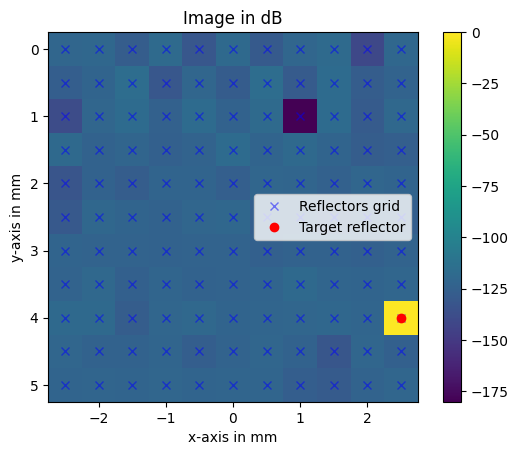

In [19]:
img_norm = img - img.min() / (img.max() - img.min()) + 1e-9
img_db = 20 * np.log10(img_norm)

offset = (reflector_grid.xres/2, reflector_grid.zres/2)

plt.figure()
plt.imshow(img_db, extent=reflector_grid.get_extent(offset=offset), aspect='equal')
plt.plot(*reflector_grid.get_coords(), "xb", alpha=.5, label="Reflectors grid")
plt.plot(xr, zr, 'or', label='Target reflector')
plt.xlabel("x-axis in mm")
plt.ylabel("y-axis in mm")
plt.title("Image in dB")
plt.colorbar()
plt.legend()